# Sentinel-3 zarr products

In [1]:
using CopernicusData
using CairoMakie
using GeoMakie
using Downloads

const PRODUCT_PATH = "https://data.ceda.ac.uk/neodc/sentinel3a/data/OLCI/L1_ERR/2024/05/06"
OLCERR="S3A_OL_1_ERR____20240506T004530_20240506T012951_20240507T012017_2661_112_088______PS1_O_NT_004.zip"

"S3A_OL_1_ERR____20240506T004530_20240506T012951_20240507T012017_2661_112_088______PS1_O_NT_004.zip"

## OLCI Level-1

In [2]:
olci_path = joinpath(PRODUCT_PATH, OLCERR)
olci_path

"https://data.ceda.ac.uk/neodc/sentinel3a/data/OLCI/L1_ERR/2024/05/06/S3A_OL_1_ERR____20240506T004530_20240506T012951_20240507T012017_2661_112_088______PS1_O_NT_004.zip"

In [3]:
local_path = joinpath(tempdir(),OLCERR)
if !isfile(local_path)
    Downloads.download(olci_path, local_path)
end

In [4]:
local_path_unzip = replace(local_path, ".zip" => ".SEN3")
if !isdir(local_path_unzip)
    run(`unzip -q "$local_path" -d "$(dirname(local_path))"`)
end

Opening the SAFE product with `YAXTrees.YAXTree` automatically converts it to the Zarr-like tree structure

In [5]:
dt = YAXTrees.open_datatree(local_path_unzip)

group_path = Symbol("/measurements")
nc_file = Symbol("geo_coordinates.nc")
nc_file = Symbol("time_coordinates.nc")
nc_file = Symbol("Oa01_radiance.nc")
nc_file = Symbol("Oa02_radiance.nc")
nc_file = Symbol("Oa03_radiance.nc")
nc_file = Symbol("Oa04_radiance.nc")
nc_file = Symbol("Oa05_radiance.nc")
nc_file = Symbol("Oa06_radiance.nc")
nc_file = Symbol("Oa07_radiance.nc")
nc_file = Symbol("Oa08_radiance.nc")
nc_file = Symbol("Oa09_radiance.nc")
nc_file = Symbol("Oa10_radiance.nc")
nc_file = Symbol("Oa11_radiance.nc")
nc_file = Symbol("Oa12_radiance.nc")
nc_file = Symbol("Oa13_radiance.nc")
nc_file = Symbol("Oa14_radiance.nc")
nc_file = Symbol("Oa15_radiance.nc")
nc_file = Symbol("Oa16_radiance.nc")
nc_file = Symbol("Oa17_radiance.nc")
nc_file = Symbol("Oa18_radiance.nc")
nc_file = Symbol("Oa19_radiance.nc")
nc_file = Symbol("Oa20_radiance.nc")
nc_file = Symbol("Oa21_radiance.nc")
group_path = Symbol("/conditions/image")
nc_file = Symbol("instrument_data.nc")
nc_file = Symbol("geo_coord

📂 root
├─ 📂 conditions
├─ ├─ 📂 geometry
├─ ├─ 📂 image
├─ ├─ 📂 instrument
├─ └─ 📂 meteorology
├─ 📂 measurements
└─ 📂 quality


### Plot data

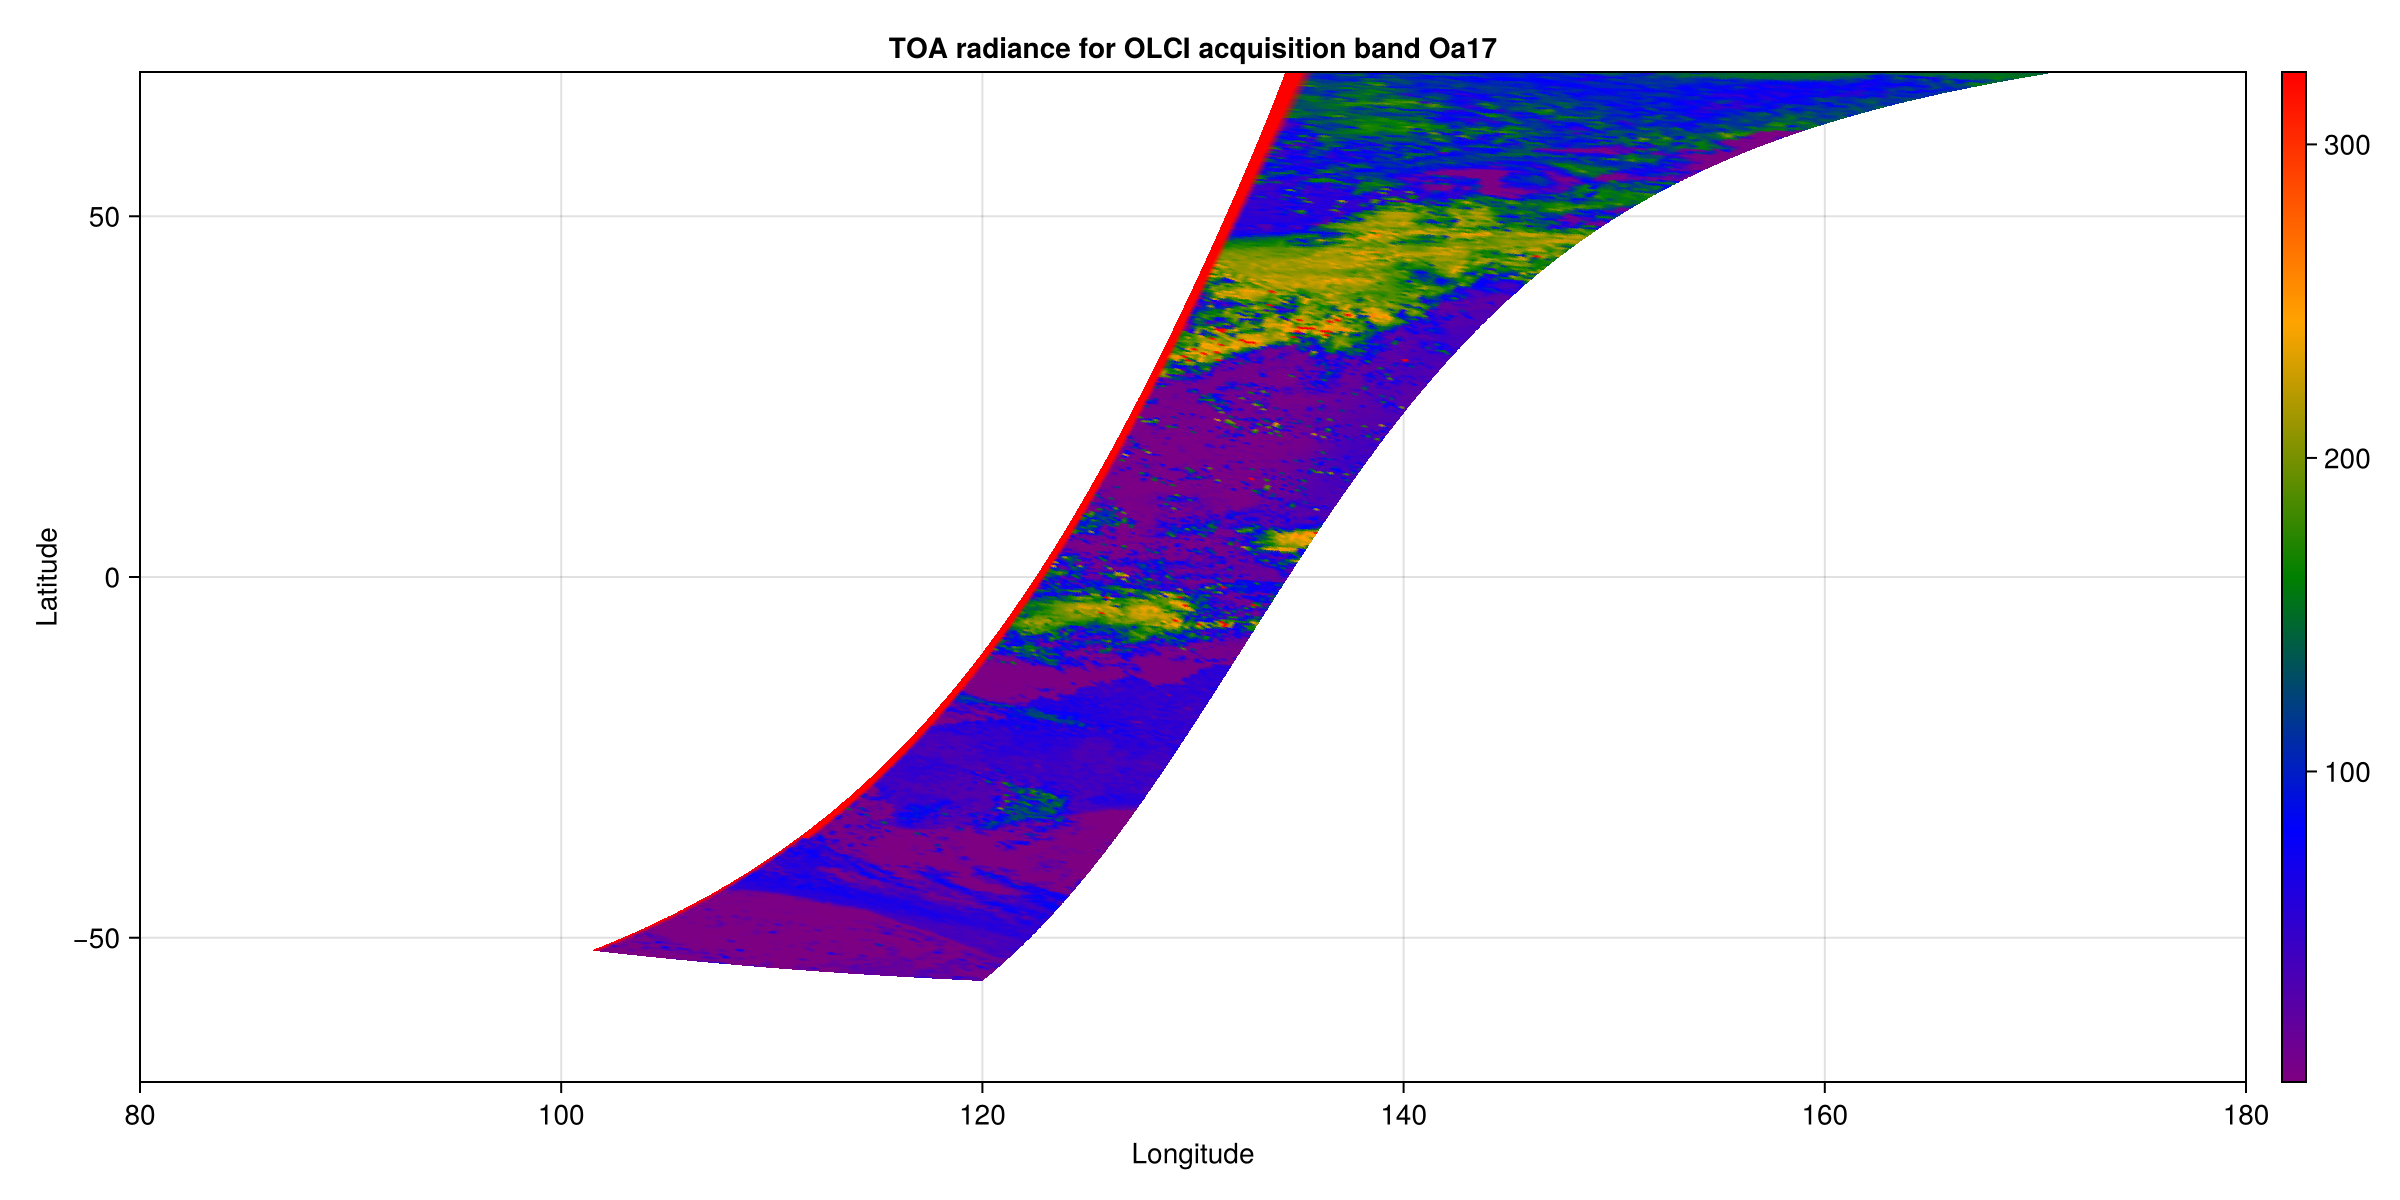

In [6]:
latitude=dt.measurements.latitude
longitude=dt.measurements.longitude
rad = dt.measurements.oa17_radiance

step=25
lon=longitude.data[1:step:end,1:step:end]
lat=latitude.data[1:step:end,1:step:end]
val=replace(rad.data[1:step:end,1:step:end], missing => 0.0)
min,max = minimum(skipmissing(val)), maximum(skipmissing(val))

fig=Figure(size=(1200,600))
ax=Axis(fig[1, 1], title=rad.properties["long_name"],
     xlabel="Longitude", ylabel="Latitude",
     limits=(80, 180, -70, 70),)
# ylims!(ax,-70,70)
s=surface!(ax,lon, lat, zeros(size(lon));
     color=val,colorrange=(min,max),colormap=:rainbow, shading=NoShading)
     Colorbar(fig[1, 2], s)
fig